# Universidade Federal do Rio Grande do Norte
# Instituto Metrópole Digital
# Docente: Ivanovitch Silva
# Discente: Rafael Costa Varela

# Visualização gráfica de dados

Neste notebook, construiremos alguns gráficos a partir de dados das eleições presidenciais de 2018.

# Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carregando os dados

In [2]:
def load_csv(csv_file):
    """
    Produz um DataFrame Pandas, utilizando como caractere separador o ponto-e-vírgula,
    e o latin-1 (ISO-8859-1) como sistema de codificação de caracteres, de acordo com
    as instruções dadas.
    """
    return pd.read_csv(csv_file, sep=";", encoding="ISO-8859-1")

votacao_br = load_csv('votacao_candidato_munzona_2018_BR.csv')
votacao_rn = load_csv('votacao_candidato_munzona_2018_RN.csv')

# Análise

Uma primeira pergunta que se pode fazer é: Quantos municípios de cada estado estão representados nestes dados? A resposta segue no gráfico a seguir:

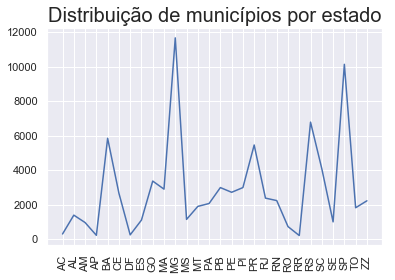

In [3]:
%matplotlib inline

# Produz um DataFrame constando quantas vezes cada estado está representado
contagens = votacao_br['SG_UF'].value_counts()
# Rotaciona os labels do eixo x em 90º, para evitar sobreposição
plt.xticks(rotation=90)
# Define o título do gráfico
plt.title('Distribuição de municípios por estado', fontsize=20)
# Plota os dados em gráfico de linhas
sns.lineplot(data=contagens)

Existe uma crença popular de que o estado de Minas Gerais é decisivo em resultados de eleições. Um primeiro indicativo pode ser visto acima: é o estado com mais municípios. Vamos ver agora a quantidade total de votos nominais em cada estado.

In [4]:
def filtra_por_estado(df, estado):
    """
    Retorna os registros referentes a um estado específico
    """
    return df['SG_UF'] == estado

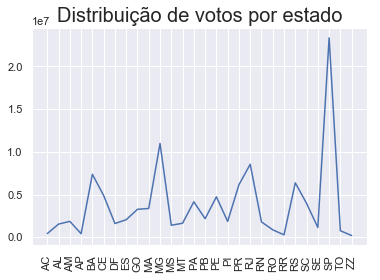

In [5]:
# Define um vetor com os estados do Brasil
estados_do_brasil = votacao_br['SG_UF'].unique()
# Define um vetor para armazenar o número total de votos em cada estado
numero_de_votos = []

# Percorre o vetor estados_do_brasil
for estado in estados_do_brasil:
    # produz o filtro de estado
    estado_filtro = filtra_por_estado(votacao_br, estado)
    # Nesta linha são efetuadas 3 operações:
    # 1ª: com votacao_br[estado_filtro], são filtrados somente os registros do estado da iteração atual
    # 2ª: a partir destes registros filtrados, as quantidades de votos nominais de cada município é adquirida
    # 3ª: as quantidades obtidas anteriormente são somadas
    numero_de_votos.append(votacao_br[estado_filtro]['QT_VOTOS_NOMINAIS'].sum())

# Cria um Pandas Series (um vetor numério nutella) a partir dos votos obtidos anteriormente
votos_por_estado= pd.Series(numero_de_votos, index=estados_do_brasil)
# Rotaciona os labels do eixo x em 90º, para evitar sobreposição
plt.xticks(rotation=90)
# Define o título do gráfico
plt.title('Distribuição de votos por estado', fontsize=20)
# Plota os dados em gráfico de linhas
sns.lineplot(data=votos_por_estado)

Percebe-se que o estado de São Paulo possui o maior público eleitor, o que é natural, dado que é o estaod mais populoso do país. Vamos verificar agora as distribuições de votos por candidato em Minas Gerais, e compará-la com a distribuição de votos no Brasil como um todo. Precisaremos antes definir algumas funções auxiliares.

In [6]:
def filtra_por_candidato(df, candidato):
    """
    Retorna os registros referentes a um candidato específico
    """
    return df['NM_CANDIDATO'] == candidato

def contagens_de_votos_no_estado(df, estado):
    """
    Calcula quantos votos cada candidato teve em um determinado estado
    """
    # Recupera a lista de candidatos
    candidatos = votacao_br['NM_CANDIDATO'].unique()
    # Define um vetor para armazenar os votos de cada candidato naquele estado
    votos = []

    for candidato in candidatos:
        candidato_filtro = filtra_por_candidato(df, candidato)
        cidade_filtro = filtra_por_estado(df, estado)
        votos.append(votacao_br[candidato_filtro & cidade_filtro]['QT_VOTOS_NOMINAIS'].sum())

    return candidatos, votos

def plota_distribuicao_de_votos(candidatos, votos, titulo_do_grafico):
    """
    Produz um gráfico de barras das quantidades de votos dos candidatos, estas calculadas
    previamente
    """
    # Define um Pandas DataFrame a partir da listagem de candidatos e dos votos calculados
    contagens_de_votos = pd.DataFrame({'candidatos': candidatos, 'votos': votos}, index=candidatos)
    # Transforma as contagens de votos em percentagens
    contagens_de_votos['votos'] = (contagens_de_votos['votos'] / contagens_de_votos['votos'].sum()) * 100
    # Ordena o DataFrame com base nas contagens de votos
    contagens_de_votos = contagens_de_votos.sort_values('votos')
    plt.title(titulo_do_grafico, fontsize=20)
    plt.xticks(rotation=90)
    # Realiza a plotagem propriamente dita
    sns.barplot(x='candidatos', y='votos', data=contagens_de_votos)

def plota_distribuicao_de_votos_por_estado(df, estado):
    """
    Plota as distribuições de votos de cada candidato em um estado específico,
    passado como parâmetro
    """
    plota_distribuicao_de_votos(*contagens_de_votos_no_estado(df, estado),
                                f'Distribuição dos votos em {estado}')

def plota_distribuicao_de_votos_no_brasil(df):
    """
    Plota as distribuições de votos totais de cada candidato
    """
    candidatos = votacao_br['NM_CANDIDATO'].unique()
    votos = []

    for candidato in candidatos:
        candidato_filtro = filtra_por_candidato(df, candidato)
        votos.append(votacao_br[candidato_filtro]['QT_VOTOS_NOMINAIS'].sum())

    plota_distribuicao_de_votos(candidatos, votos, f'Distribuição dos votos no Brasil')

    return candidatos, votos

Agora vamos plotar os dados:

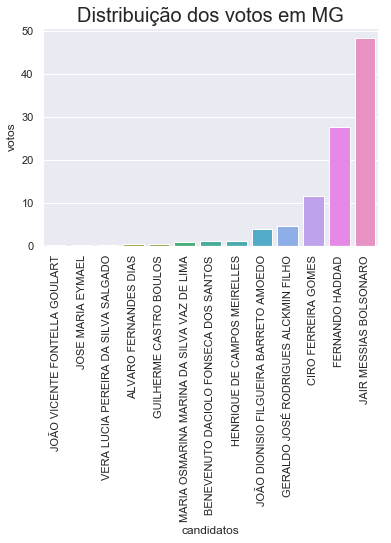

In [7]:
candidatos_mg, votos_mg = contagens_de_votos_no_estado(votacao_br, 'MG')
plota_distribuicao_de_votos_por_estado(votacao_br, 'MG')

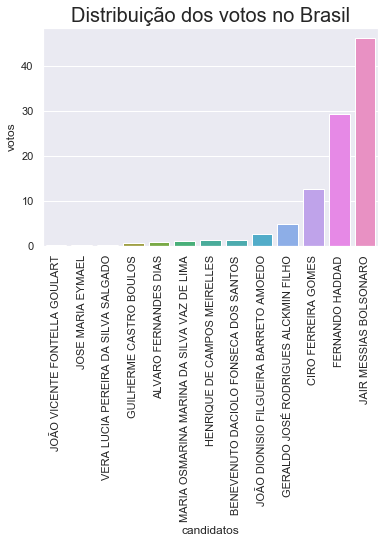

In [8]:
candidatos_br, votos_br = plota_distribuicao_de_votos_no_brasil(votacao_br)

Percebe-se que o desenho dos gráficos acima está muito semelhante, mas o quão semelhante? Podemos quantificar esta semelhança através da **Correlaçao de Pearson**. Faremos isto não só para Minas Gerais em relação ao Brasil, mas também para os demais estados.

Para tanto, tabularemos as quantidades de votos que cada candidato teve em cada estado juntamente com as quantidades totais de votos de cada voto. Geraremos então uma matriz de correlação, e plotaremos os valores de correlação entre cada estado e o Brasil.

## Construindo a Tabela

In [9]:
# Aqui definimos um dicionário Python, em que as chaves são os estados do Brasil, além do 
# próprio Brasil, e os valores serão as contagens de votos.
comparacao_estados_brasil = {'BR': votos_br}
for estado in estados_do_brasil:
    # Aqui obtemos as contagens de votos de cada candidato em cada estado
    candidatos, votos = contagens_de_votos_no_estado(votacao_br, estado)
    # E guardamos no dicionário
    comparacao_estados_brasil[estado] = votos

In [10]:
# Vejamos como ficou
comparacao_estados_brasil = pd.DataFrame(comparacao_estados_brasil, index=candidatos_br)
comparacao_estados_brasil.head()

,BR,MG,CE,BA,SC,RS,PR,SP,DF,MS,...,GO,AP,MT,AC,PI,SE,ES,RJ,RO,RR
GUILHERME CASTRO BOULOS,617122,50587,15103,31499,21484,41736,27091,187451,13177,6174,...,13806,5432,6858,1642,6145,7934,8358,57846,5368,2443
BENEVENUTO DACIOLO FONSECA DOS SANTOS,1348323,110054,54786,138234,22392,35458,39955,274672,26925,14337,...,33349,8882,12907,3564,12212,14069,41734,211444,9816,2928
MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA,1069577,97410,18071,61481,25813,50007,47335,262050,32115,12279,...,28783,9008,12487,10557,13313,15829,26529,130794,7351,4098
GERALDO JOSÉ RODRIGUES ALCKMIN FILHO,5096349,506590,53157,172900,154068,350800,220744,2224049,53640,90897,...,146440,19241,67498,33115,47974,45978,79049,208325,37048,19231
JAIR MESSIAS BOLSONARO,49276990,5308047,1061075,1725140,2603665,3353623,3496448,12378012,936494,769116,...,1868686,166935,981119,262508,346944,310310,1122131,5107735,538311,174306


Agora vamos extrair a matrix de correlação:

In [11]:
matriz_correlacao = comparacao_estados_brasil.corr()

In [12]:
matriz_correlacao

,BR,MG,CE,BA,SC,RS,PR,SP,DF,MS,...,GO,AP,MT,AC,PI,SE,ES,RJ,RO,RR
BR,1.000000,0.998055,0.705850,0.760988,0.925686,0.984315,0.959328,0.951576,0.920462,0.980165,...,0.971710,0.991776,0.972245,0.942462,0.704835,0.845026,0.983943,0.937569,0.954699,0.940066
MG,0.998055,1.000000,0.675106,0.726553,0.945251,0.991989,0.972084,0.965817,0.937100,0.988474,...,0.982479,0.982963,0.982331,0.957455,0.666695,0.814755,0.991563,0.952205,0.968793,0.956260
CE,0.705850,0.675106,1.000000,0.720759,0.466145,0.621058,0.540379,0.558862,0.571818,0.576242,...,0.563358,0.742832,0.540220,0.479186,0.725789,0.785515,0.601481,0.578566,0.507654,0.475734
BA,0.760988,0.726553,0.720759,1.000000,0.477561,0.637948,0.569961,0.533273,0.451188,0.638568,...,0.602340,0.834341,0.625917,0.531921,0.995374,0.987292,0.647269,0.493576,0.560233,0.521137
SC,0.925686,0.945251,0.466145,0.477561,1.000000,0.976323,0.991017,0.986611,0.981912,0.978893,...,0.987603,0.872901,0.983118,0.992965,0.398653,0.587369,0.977121,0.986342,0.994615,0.996081
RS,0.984315,0.991989,0.621058,0.637948,0.976323,1.000000,0.990281,0.988739,0.969784,0.997292,...,0.996764,0.954577,0.992859,0.982929,0.571254,0.738683,0.997984,0.979728,0.989234,0.982756
PR,0.959328,0.972084,0.540379,0.569961,0.991017,0.990281,1.000000,0.986051,0.974409,0.991607,...,0.994922,0.918361,0.993197,0.989686,0.496728,0.672325,0.991322,0.983250,0.995946,0.991404
SP,0.951576,0.965817,0.558862,0.533273,0.986611,0.988739,0.986051,1.000000,0.983134,0.986680,...,0.988710,0.907273,0.980610,0.988568,0.461643,0.646867,0.983082,0.986081,0.987219,0.989499
DF,0.920462,0.937100,0.571818,0.451188,0.981912,0.969784,0.974409,0.983134,1.000000,0.960308,...,0.972539,0.866908,0.957149,0.969651,0.377954,0.575773,0.964320,0.997986,0.972390,0.973206
MS,0.980165,0.988474,0.576242,0.638568,0.978893,0.997292,0.991607,0.986680,0.960308,1.000000,...,0.997705,0.950709,0.997894,0.989579,0.569219,0.734569,0.998147,0.972766,0.993554,0.988588


Por fim, vamos plotar somente a coluna _BR_, que corresponde às correlações de cada estado com o país. Antes, iremos ordenar esta coluna.

In [13]:
coluna_br_ordenada = matriz_correlacao['BR'].sort_values()

E agora vamos plotá-la. Nota-se claramente que a correlação de Minas Gerais com o Brasil aproxima-se em muito do valor 1, juntamente com os estados do Amapá e Rio Grande do Sul, o que evidencia, assim, que a crença tem seu fundo de verdade. 

Text(0.5, 1.0, 'Correlação das contagens de votos entre os estados e o país')

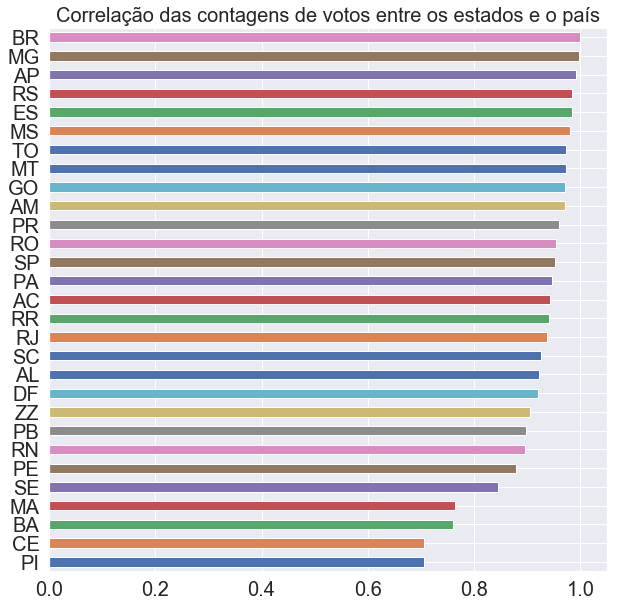

In [14]:
coluna_br_ordenada.plot(kind='barh', fontsize=20, figsize=(10,10))
plt.title('Correlação das contagens de votos entre os estados e o país', fontsize=20)